## Setup

In [1]:
from tensorflow.keras.models import load_model
import numpy as np 
import matplotlib.pyplot as plt

from hot_dust import preprocess

In [2]:
ds = preprocess.prepare_training_data()
train, validate, test = preprocess.to_tensorflow(preprocess.split_training_data(ds))
batch_size = 2**10
test = test.batch(batch_size)

## Model Summary

In [3]:
network = load_model("data/network")
network.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 11)]              0         
                                                                 
 normalization (Normalizatio  (None, 11)               23        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_3 (Dense)             (None, 8)                 264       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 680
Trainable params: 657
Non-trainable params: 23
______________________________________________________________

## Metrics

In [4]:
# TODO calculate metrics (.eg MSE, R2) on test data and tabulate 


## Plots

13/13 [==============================] - 0s 2ms/step


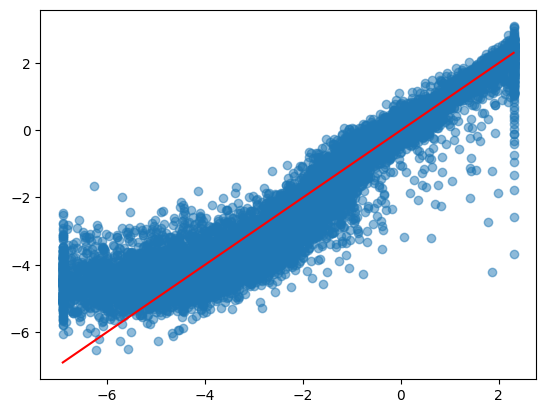

In [5]:
# TODO plot of y_hat against y, with a one-to-one line overlayed
y = np.concatenate(list(i[1] for i in test.as_numpy_iterator()))
y_hat = network.predict(test).reshape((-1,)) 

# plot y_hat against y 
plt.scatter(y, y_hat, alpha=0.5) 
# one-to-one line overlay 
plt.plot([min(y), max(y)], [min(y), max(y)], color='red') 

(array([  1.,   1.,   1.,   0.,   2.,   2.,   3.,   4.,   4.,   1.,   3.,
          8.,  14.,  16.,  15.,  21.,  20.,  27.,  24.,  46.,  46.,  53.,
         36.,  49.,  65.,  73.,  83.,  78.,  66.,  83.,  92.,  96., 111.,
        116., 159., 175., 222., 312., 407., 572., 690., 778., 900., 973.,
        944., 826., 769., 616., 578., 536., 464., 381., 282., 235., 172.,
        127.,  83.,  46.,  52.,  21.,  14.,  10.,  11.,  11.,   7.,   6.,
          4.,   7.,   3.,   0.,   1.,   5.,   1.,   2.,   0.,   2.,   0.,
          1.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.]),
 array([-4.61216736, -4.50524187, -4.39831591, -4.29139042, -4.18446445,
        -4.07753897, -3.970613  , -3.86368728, -3.75676155, -3.64983582,
        -3.5429101 , -3.43598437, -3.32905865, -3.22213316, -3.11520743,
        -3.00828171, -2.90135598, -2.79443026, -2.68750453, -2.5805788 ,
        -2.47365308, -2.36

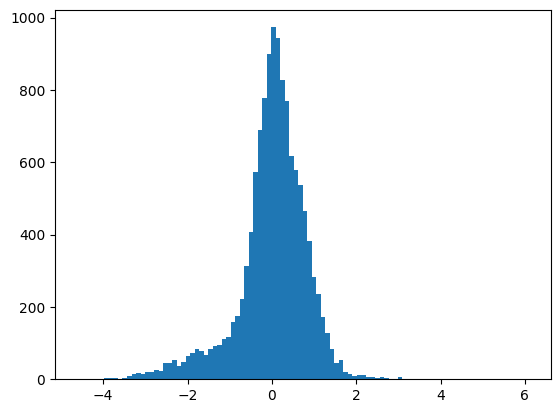

In [6]:
# TODO plot a histogram of the residuals (y = y_hat + residual) 
residual = y - y_hat  
num_bins = 100 
plt.hist(residual, num_bins)



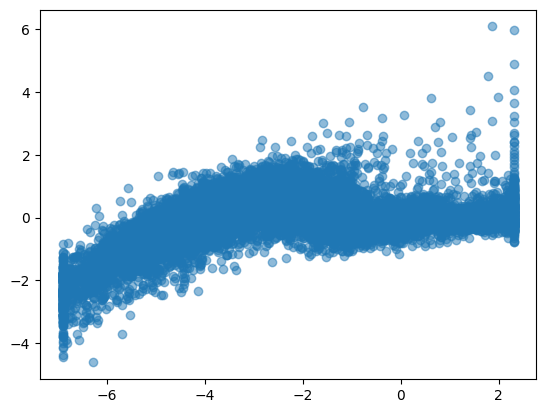

In [7]:
# TODO plot of the residuals against y 
plt.scatter(y, residual, alpha=0.5) 
